In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import  Sequential 
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [179]:
data = pd.read_csv('StockCSV/AAPL.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-08,50.474998,51.334999,50.437500,50.724998,48.832897,105358000
1,2019-05-09,50.099998,50.419998,49.165001,50.180000,48.308235,139634400
2,2019-05-10,49.355000,49.712502,48.192501,49.294998,47.638988,164834800
3,2019-05-13,46.927502,47.369999,45.712502,46.430000,44.870247,229722400
4,2019-05-14,46.602501,47.424999,46.352501,47.165001,45.580551,146118800
...,...,...,...,...,...,...,...
1254,2024-05-01,169.580002,172.710007,169.110001,169.300003,169.300003,50383100
1255,2024-05-02,172.509995,173.419998,170.889999,173.029999,173.029999,94214900
1256,2024-05-03,186.649994,187.000000,182.660004,183.380005,183.380005,163224100
1257,2024-05-06,182.350006,184.199997,180.419998,181.710007,181.710007,78569700


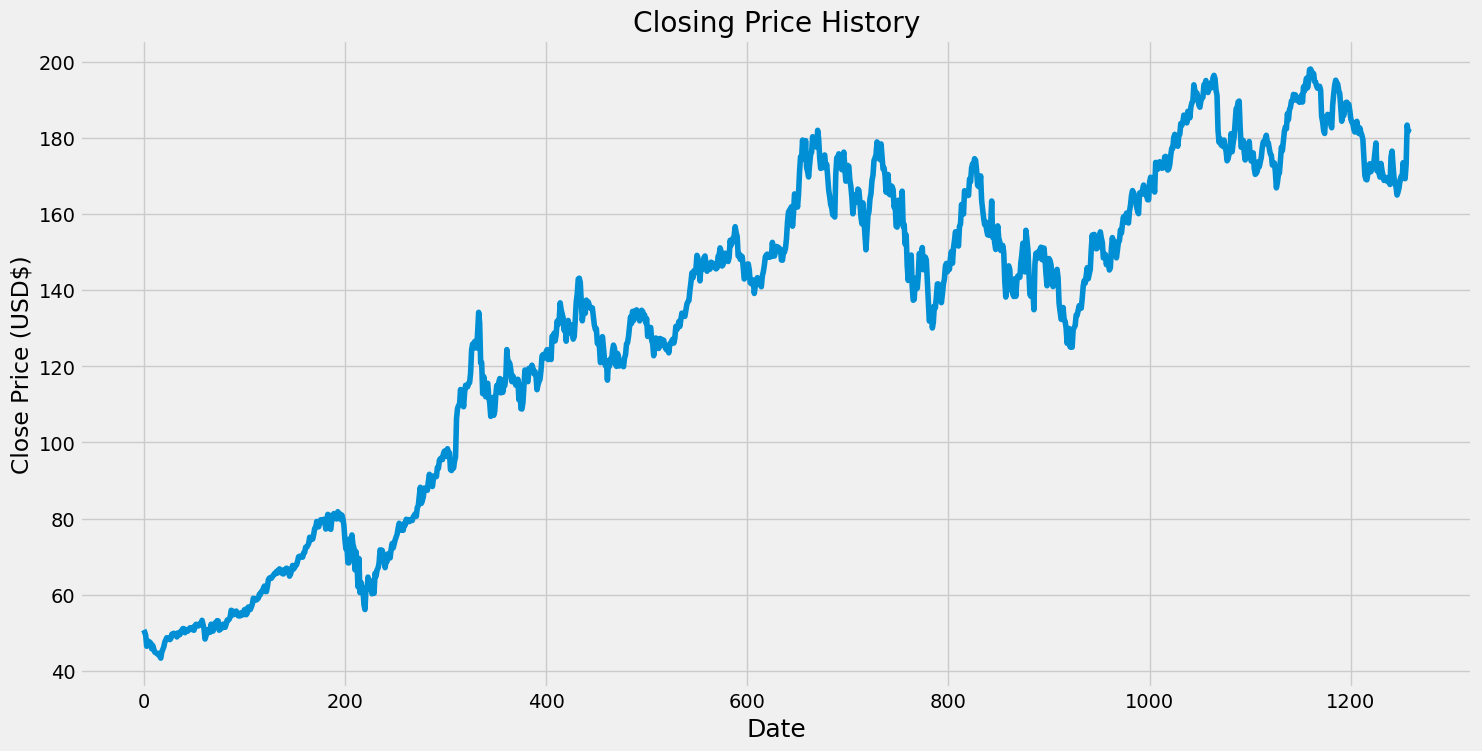

In [180]:
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD$)')
plt.plot(data['Close'])
plt.show()

In [181]:
training_data_len = int(len(data)*0.8)

In [182]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1,1))
scaled_data

array([[0.04464024],
       [0.04127677],
       [0.03698639],
       ...,
       [0.9071882 ],
       [0.89648226],
       [0.9009056 ]])

In [183]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(scaled_data[i-60:i,0])
  y_train.append(scaled_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [184]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [185]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10


c:\Users\hkevi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


947/947 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.0102
Epoch 2/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.0016
Epoch 3/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 0.0011
Epoch 4/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 6.4624e-04
Epoch 5/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 6.8766e-04
Epoch 6/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 6.7571e-04
Epoch 7/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 6.1286e-04
Epoch 8/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 6.3350e-04
Epoch 9/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 5.8718e-04
Epoch 10/10
947/947 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 5.2536e-04


In [186]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = data[training_data_len:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions1 = model.predict(x_test)
predictions1 = scaler.inverse_transform(predictions1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [187]:
actual_prices = data[:training_data_len]
predicted_prices = data[training_data_len:]
predicted_prices['Predictions1'] = predictions1

C:\Users\hkevi\AppData\Local\Temp\ipykernel_35516\2714583158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_prices['Predictions1'] = predictions1


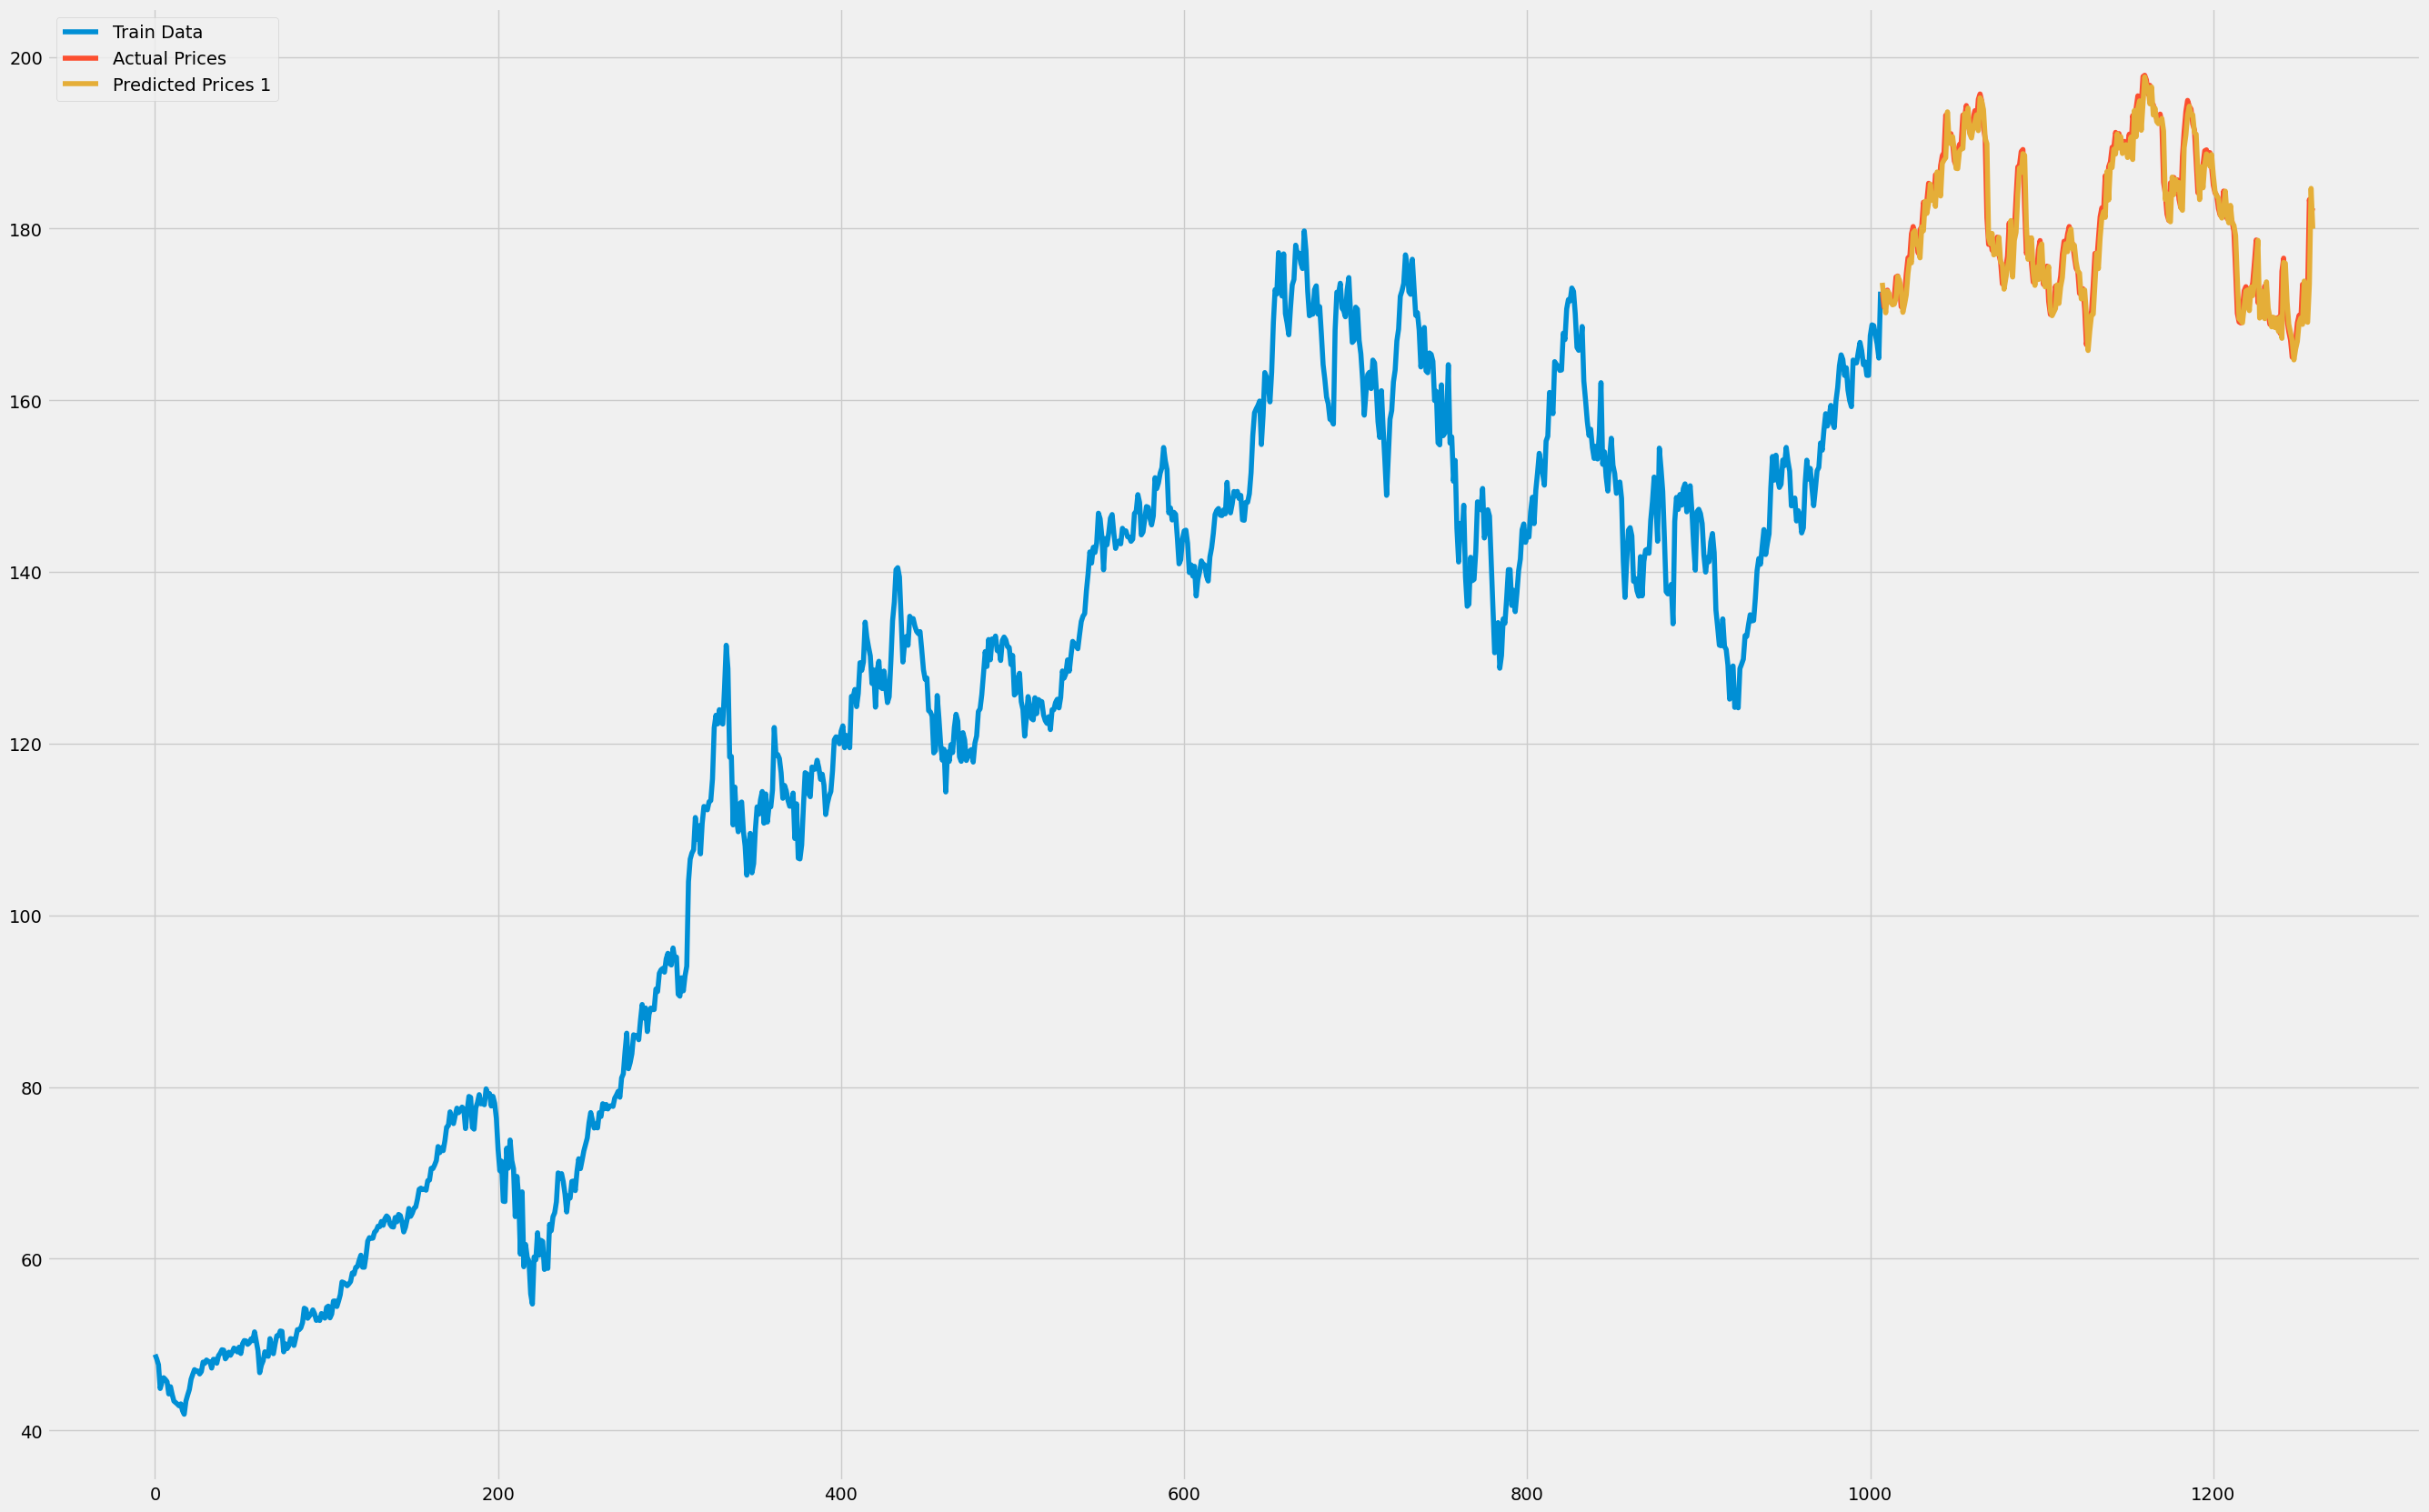

In [188]:
plt.figure(figsize=(30,20))
plt.plot(actual_prices['Adj Close'])
plt.plot(predicted_prices[['Adj Close','Predictions1']])
plt.legend(['Train Data', 'Actual Prices','Predicted Prices 1'], loc='upper left')
plt.show()

In [189]:
predicted_prices[['Date','Adj Close', 'Predictions1']].tail(10)

,Date,Adj Close,Predictions1
1249,2024-04-24,169.020004,166.843094
1250,2024-04-25,169.889999,169.020065
1251,2024-04-26,169.300003,169.585800
1252,2024-04-29,173.500000,168.836411
1253,2024-04-30,170.330002,173.884003
1254,2024-05-01,169.300003,169.235870
1255,2024-05-02,173.029999,169.079269
1256,2024-05-03,183.380005,173.475876
1257,2024-05-06,181.710007,184.677979
1258,2024-05-07,182.399994,179.983292


In [190]:
apple_quote = pd.read_csv('StockCSV/AAPL.csv')
new_data = apple_quote.filter(['Adj Close'])
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
x_test_new = [last_60_days_scaled]
x_test_new = np.array(x_test_new)
x_test_new = np.reshape(x_test_new, (x_test_new.shape[0], x_test_new.shape[1], 1))
pred_prices = model.predict(x_test_new)
pred_prices = scaler.inverse_transform(pred_prices)
print(pred_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[182.09492]]
